In [ ]:
#importing libraries
import dlib
import cmake
import cv2
import face_recognition
import os
from datetime import datetime
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import pandas as pd

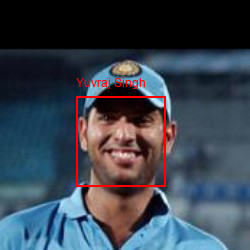

Yuvraj Singh Authenticated !


In [ ]:
#Capturing a screenshot 
from PIL import ImageGrab
import time
time.sleep(10)  # 10 seconds
screenshot = ImageGrab.grab()
desktop_path = os.path.expanduser("C:/Users/kanik/anaconda3/CAPSTONE/test")
file_path = os.path.join(desktop_path, "test.png")
screenshot.save(file_path)

# Load test encodings
test_encodings = []
test_labels = []
for file in os.listdir('C:/Users/kanik/anaconda3/CAPSTONE/test'):
    image = face_recognition.load_image_file(os.path.join('C:/Users/kanik/anaconda3/CAPSTONE/test', file))
    face_locations = face_recognition.face_locations(image)
    if len(face_locations) > 0:
        encoding = face_recognition.face_encodings(image, [face_locations[0]])[0]
        test_encodings.append(encoding)
        test_labels.append(file.split('.')[0])
    else:
        print(f"No face found in {file}")

# Load folder images
folder_images = []
folder_labels = []
folder_encodings = []
for file in os.listdir('C:/Users/kanik/anaconda3/CAPSTONE/lfw/Yuvraj_Singh'):
    image = face_recognition.load_image_file(os.path.join('C:/Users/kanik/anaconda3/CAPSTONE/lfw/Yuvraj_Singh', file))
    face_locations = face_recognition.face_locations(image)
    if len(face_locations) > 0:
        folder_images.append(image)
        folder_labels.append(file.split('.')[0])
        folder_encodings.append(face_recognition.face_encodings(image, [face_locations[0]])[0])
    else:
        print(f"No face found in {file}")


# Compare test encodings with folder encodings
for i, test_encoding in enumerate(test_encodings):
    distances = face_recognition.face_distance(test_encoding, folder_encodings)
    min_distance = min(distances)
    min_index = np.argmin(distances)
    present = False  # initialize variable
    if min_distance < 0.6:
        # Open the image and draw a rectangle around the face
        image = Image.fromarray(np.array(folder_images[min_index]))
        draw = ImageDraw.Draw(image)
        face_locations = face_recognition.face_locations(np.array(folder_images[min_index]))
        top, right, bottom, left = face_locations[0]
        draw.rectangle(((left, top), (right, bottom)), outline=(255, 0, 0), width=2)
        
        # Add label above the rectangle
        font = ImageFont.truetype("arial.ttf", 12)
        label = folder_labels[0].replace('_', ' ')
        draw.text((left, top-20), label, font=font, fill=(255, 0, 0))
        
        # Display the image
        display(image)
        print(label,"Authenticated !")

In [ ]:
if label in customerdata["Customer Name"].values:
    print("True")
else:
    print("False")

True


In [ ]:
label="Yuvraj Singh"

customerdata=pd.read_csv("updated_customer_data1.csv")
customer_ids = customerdata['CustomerID'].unique()
item_ids = customerdata['Product ID'].unique()

# initialize user-item matrix
user_item_matrix = np.zeros((len(customer_ids), len(item_ids)))


for index, row in customerdata.iterrows():
    customer_index = np.where(customer_ids == row['CustomerID'])[0][0]
    item_index = np.where(item_ids == row['Product ID'])[0][0]
    user_item_matrix[customer_index][item_index] = row['Quantity']
    
    
print(user_item_matrix)

item_ids

from sklearn.metrics.pairwise import cosine_similarity

# compute item-item similarity matrix
item_item_similarity = cosine_similarity(user_item_matrix.T)

# print item-item similarity matrix
print(item_item_similarity)

# recommend top 5 items for item 'FUR-CH-10002774'
item_of_interest = 'FUR-CH-10002774'
item_index = np.where(item_ids == item_of_interest)[0][0]
similar_items = np.argsort(item_item_similarity[item_index])[::-1][1:6]

# get product names for recommended items
recommended_item_names = customerdata[customerdata['Product ID'].isin([item_ids[i] for i in similar_items])]['Product Name'].unique()

print(f"Top 5 recommended items for item '{item_of_interest}': {recommended_item_names}")
print(f"Top 5 recommended items for item '{item_of_interest}': {recommended_items}")

recommended_items = [item_ids[i] for i in similar_items]


[[2. 3. 0. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[1.         0.05503429 0.         ... 0.         0.         0.        ]
 [0.05503429 1.         0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]
Top 5 recommended items for item 'FUR-CH-10002774': ['6" Cubicle Wall Clock, Black'
 'Imation\xa0USB 2.0 Swivel\xa0Flash Drive\xa0USB\xa0flash drive\xa0- 4 GB - Pink'
 'XtraLife ClearVue Slant-D Ring Binders by Cardinal'
 'Sony 16GB Class 10 Micro SDHC R40 Memory Card'
 'Cisco SPA112 2 Port Phone Adapter']
Top 5 recommended items for item 'FUR-CH-10002774': ['TEC-PH-10004912', 'FUR-FU-10000260', '

In [ ]:
# recommend top 5 items for item 'X'
item_of_interest = 'FUR-CH-10002774'
item_index = np.where(item_ids == item_of_interest)[0][0]
similar_items = np.argsort(item_item_similarity[item_index])[::-1][1:6]
recommended_items = [item_ids[i] for i in similar_items]

print(f"Top 5 recommended items for item '{item_of_interest}': {recommended_items}")


Top 5 recommended items for item 'FUR-CH-10002774': ['TEC-PH-10004912', 'FUR-FU-10000260', 'TEC-AC-10001101', 'TEC-AC-10001445', 'OFF-BI-10000285']


In [ ]:

# iterate over item IDs and get top 5 recommended items
for item_of_interest in ordered_product_ids:
    item_index = np.where(item_ids == item_of_interest)[0][0]
    similar_items = np.argsort(item_item_similarity[item_index])[::-1][1:6]
    recommended_item_names = customerdata[customerdata['Product ID'].isin([item_ids[i] for i in similar_items])]['Product Name'].unique()
    #print(f"Top 5 recommended items for item '{item_of_interest}': {recommended_item_names}")


In [ ]:

ordered_product_ids = customerdata.loc[customerdata['Customer Name'] == label, 'Product ID'].unique()
print(f"The customer {label} has ordered the following products: {ordered_product_ids}")


The customer Yuvraj Singh has ordered the following products: ['OFF-AR-10000246' 'OFF-AP-10001492' 'OFF-PA-10001639' 'TEC-PH-10004700'
 'FUR-CH-10000988' 'OFF-FA-10000490' 'OFF-BI-10000962' 'OFF-AR-10001953'
 'TEC-PH-10000923' 'OFF-PA-10003228' 'OFF-SU-10004498' 'FUR-FU-10000076'
 'TEC-AC-10002335' 'OFF-ST-10004180' 'TEC-AC-10002926' 'OFF-PA-10003797'
 'OFF-PA-10002195' 'OFF-FA-10000304' 'TEC-AC-10000358' 'TEC-AC-10002800'
 'OFF-AR-10000658' 'TEC-PH-10000347' 'OFF-ST-10002406']


In [ ]:
customer_orders = customerdata[customerdata['Customer Name'] == label]
ordered_products = customer_orders.groupby('Product Name')['Quantity'].sum().sort_values(ascending=False)

# get most ordered item
most_ordered_item = ordered_products.index[0:5]
top5_item_quantity = ordered_products[0:5]

print(f"The customer {label} has ordered {top5_item_quantity} ") #units of the following product: {most_ordered_item}")


The customer Yuvraj Singh has ordered Product Name
Xerox 1917                                     9
Hon Olson Stacker Stools                       9
Newell 318                                     7
Acco Six-Outlet Power Strip, 4' Cord Length    7
PowerGen Dual USB Car Charger                  7
Name: Quantity, dtype: int64 
